In [2]:
import pandas as pd
from datetime import datetime

In [3]:
df = pd.read_csv('crash-data-monroe-county-2013-2018-7.csv', encoding='ISO-8859-1')
df

,Agency,City,DATE,TIME,VEH#,Trailers,INJ,DEAD,DEER,House#,...,Weather,Surf Con,Median,Rd Junction,Road Char,Surface,Primary Factor,Collision Type,Unique Id,Traffic Control
0,MCSD,BLOOMINGTON,7/30/2014,1:16 AM,1,0,0.0,0.0,0.0,NaN,...,CLEAR,DRY,NONE,NaN,CURVE/GRADE,ASP,RAN OFF ROAD RIGHT,RAN OFF ROAD,1STAVENUESANDERSAVES FAIRFAXRD,LANE CONTROL
1,BPD,BLOOMINGTON,5/11/2015,9:50 AM,2,0,0.0,0.0,0.0,203,...,CLOUDY,DRY,NaN,NaN,STRAIGHT/LEVEL,ASP,OTHER (DRIVER),RIGHT ANGLE,W 1STST,NONE
2,BPD,BLOOMINGTON,1/4/2016,2:06 PM,2,0,0.0,0.0,0.0,709,...,CLEAR,DRY,NaN,NaN,NON-ROADWAY CRASH,ASP,UNSAFE BACKING,BACKING CRASH,W1STST,NONE
3,BPD,BLOOMINGTON,6/14/2016,3:00 PM,2,0,0.0,0.0,0.0,1007,...,RAIN,WET,NaN,NaN,STRAIGHT/GRADE,GRAVEL,IMPROPER TURNING,RIGHT TURN,1STST,NONE
4,BPD,BLOOMINGTON,8/6/2013,1340,1,0,1.0,0.0,0.0,1210,...,CLOUDY,DRY,NONE,NaN,STRAIGHT/LEVEL,ASP,DRIVER ILLNESS,RAN OFF ROAD,E1STST,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22406,MCSD,BLOOMINGTON,11/16/2018,5:58 PM,2,0,0.0,0.0,0.0,,...,CLEAR,DRY,NaN,NONE,STRAIGHT/LEVEL,ASP,UNSAFE BACKING,BACKING CRASH,SYOSTAVE,NONE
22407,MCSD,BLOOMINGTON,12/12/2015,3:21 AM,2,0,0.0,0.0,0.0,2212,...,CLEAR,DRY,NaN,NaN,NON-ROADWAY CRASH,ASP,OTHER (DRIVER),OTHER - EXPLAIN IN NARRATIVE,SYOSTAVE,NONE
22408,BPD,BLOOMINGTON,11/6/2017,7:50 AM,2,0,0.0,0.0,0.0,831,...,NaN,NaN,NaN,NaN,STRAIGHT/LEVEL,ASP,UNSAFE BACKING,BACKING CRASH,EZENITHTER,NONE
22409,MCSD,BLOOMINGTON,6/16/2016,7:28 PM,1,0,1.0,0.0,0.0,7500,...,CLEAR,DRY,NaN,NaN,STRAIGHT/GRADE,ASP,DRIVER DISTRACTED,RAN OFF ROAD,7500SZIKESRDSMITHVILLERD,NONE


In [22]:
df['TIME'].head()

0       1:16 AM
1       9:50 AM
2       2:06 PM
3       3:00 PM
4          1340
         ...   
145     8:10 PM
146    11:53 AM
147    12:18 PM
148     3:02 AM
149     7:49 AM
Name: TIME, Length: 150, dtype: object

In [4]:
def convert_time(time_str):
    try:
        # Try to convert using 12-hour format (with AM/PM)
        return datetime.strptime(time_str, '%I:%M %p').time()
    except ValueError:
        # If 12-hour conversion fails, assume it's 24-hour format
        time_str = time_str.zfill(4)
        return datetime.strptime(time_str, '%H%M').time()

In [5]:
# Convert 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)

# Convert 'TIME' column to a proper datetime time object
# Apply the function to the 'TIME' column
df['TIME'] = df['TIME'].apply(convert_time)

C:\Users\siswa\AppData\Local\Temp\ipykernel_16464\973003799.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)


In [6]:
df['DATETIME'] = df.apply(lambda row: datetime.combine(row['DATE'], row['TIME']), axis=1)


In [15]:
# Optional: Extract features like hour, day of week, etc.
df['Hour'] = df['DATETIME'].dt.hour
df['Day_of_Week'] = df['DATETIME'].dt.day_name()
df

,Agency,City,DATE,TIME,VEH#,Trailers,INJ,DEAD,DEER,House#,...,Rd Junction,Road Char,Surface,Primary Factor,Collision Type,Unique Id,Traffic Control,DATETIME,Hour,Day_of_Week
0,MCSD,BLOOMINGTON,2014-07-30,01:16:00,1,0,0.0,0.0,0.0,NaN,...,NaN,CURVE/GRADE,ASP,RAN OFF ROAD RIGHT,RAN OFF ROAD,1STAVENUESANDERSAVES FAIRFAXRD,LANE CONTROL,2014-07-30 01:16:00,1,Wednesday
1,BPD,BLOOMINGTON,2015-05-11,09:50:00,2,0,0.0,0.0,0.0,203,...,NaN,STRAIGHT/LEVEL,ASP,OTHER (DRIVER),RIGHT ANGLE,W 1STST,NONE,2015-05-11 09:50:00,9,Monday
2,BPD,BLOOMINGTON,2016-01-04,14:06:00,2,0,0.0,0.0,0.0,709,...,NaN,NON-ROADWAY CRASH,ASP,UNSAFE BACKING,BACKING CRASH,W1STST,NONE,2016-01-04 14:06:00,14,Monday
3,BPD,BLOOMINGTON,2016-06-14,15:00:00,2,0,0.0,0.0,0.0,1007,...,NaN,STRAIGHT/GRADE,GRAVEL,IMPROPER TURNING,RIGHT TURN,1STST,NONE,2016-06-14 15:00:00,15,Tuesday
4,BPD,BLOOMINGTON,2013-08-06,13:40:00,1,0,1.0,0.0,0.0,1210,...,NaN,STRAIGHT/LEVEL,ASP,DRIVER ILLNESS,RAN OFF ROAD,E1STST,NONE,2013-08-06 13:40:00,13,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22406,MCSD,BLOOMINGTON,2018-11-16,17:58:00,2,0,0.0,0.0,0.0,,...,NONE,STRAIGHT/LEVEL,ASP,UNSAFE BACKING,BACKING CRASH,SYOSTAVE,NONE,2018-11-16 17:58:00,17,Friday
22407,MCSD,BLOOMINGTON,2015-12-12,03:21:00,2,0,0.0,0.0,0.0,2212,...,NaN,NON-ROADWAY CRASH,ASP,OTHER (DRIVER),OTHER - EXPLAIN IN NARRATIVE,SYOSTAVE,NONE,2015-12-12 03:21:00,3,Saturday
22408,BPD,BLOOMINGTON,2017-11-06,07:50:00,2,0,0.0,0.0,0.0,831,...,NaN,STRAIGHT/LEVEL,ASP,UNSAFE BACKING,BACKING CRASH,EZENITHTER,NONE,2017-11-06 07:50:00,7,Monday
22409,MCSD,BLOOMINGTON,2016-06-16,19:28:00,1,0,1.0,0.0,0.0,7500,...,NaN,STRAIGHT/GRADE,ASP,DRIVER DISTRACTED,RAN OFF ROAD,7500SZIKESRDSMITHVILLERD,NONE,2016-06-16 19:28:00,19,Thursday


In [7]:
df['CRASH_COUNT'] = 1

In [8]:
# Sample DataFrame
# Assuming 'DATE' column is in MM/DD/YYYY format
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')

# Group by date (per day) and aggregate data (e.g., summing up crash counts)
# Assuming you have a 'CRASH_COUNT' column which contains the number of crashes
daily_crashes = df.groupby(df['DATE'].dt.date).agg({'CRASH_COUNT': 'sum'}).reset_index()

# Rename the columns for clarity
daily_crashes.columns = ['DATE', 'TOTAL_CRASHES']

In [10]:
daily_crashes

,DATE,TOTAL_CRASHES
0,2013-01-01,3
1,2013-01-02,4
2,2013-01-03,5
3,2013-01-04,8
4,2013-01-05,8
...,...,...
2184,2018-12-27,7
2185,2018-12-28,6
2186,2018-12-29,8
2187,2018-12-30,2


In [11]:
daily_crashes['DATE'][:'2017']

TypeError: cannot do slice indexing on RangeIndex with these indexers [2017] of type str

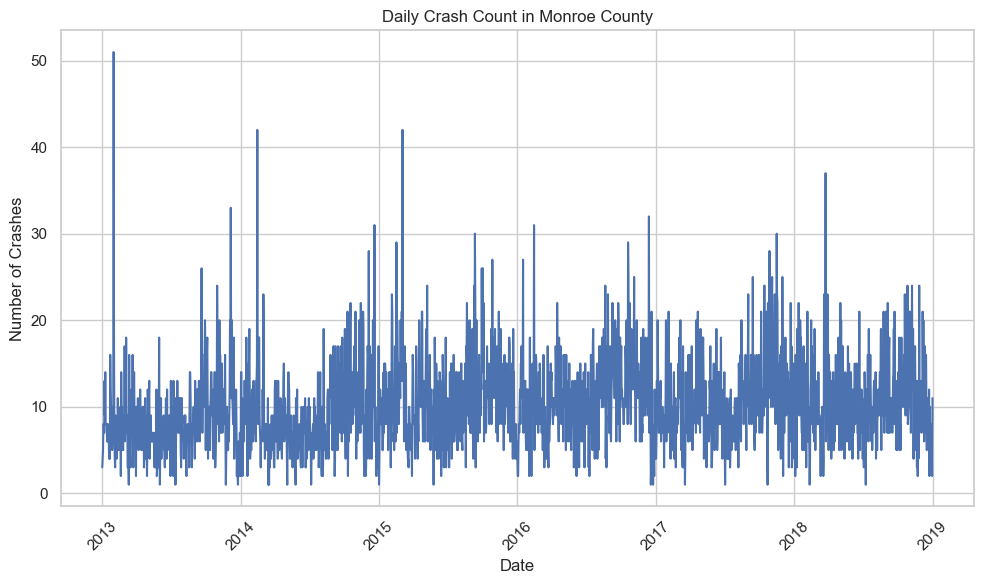

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the theme for seaborn
sns.set_theme(style="whitegrid")

# Create a line plot with Seaborn
plt.figure(figsize=(10,6))
sns.lineplot(x='DATE', y='TOTAL_CRASHES', data=daily_crashes, color='b')


# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.title('Daily Crash Count in Monroe County')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


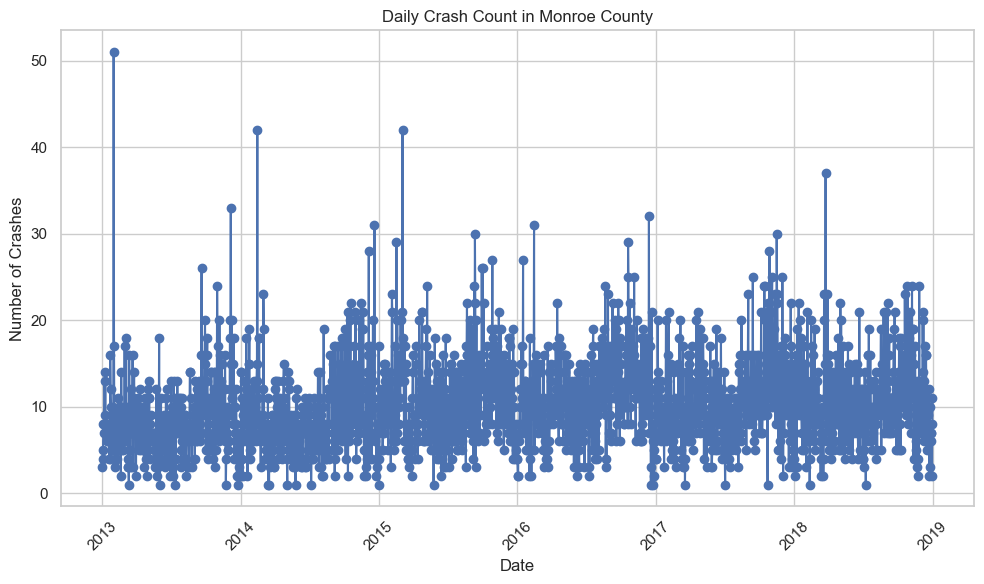

In [22]:
import matplotlib.pyplot as plt

# Assuming daily_crashes is your DataFrame from the aggregation step
plt.figure(figsize=(10,6))

# Plotting the total crashes per day
plt.plot(daily_crashes['DATE'], daily_crashes['TOTAL_CRASHES'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.title('Daily Crash Count in Monroe County')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [14]:
daily_crashes['DATE'] = pd.to_datetime(daily_crashes['DATE'])  # Ensure DATE is in datetime format
daily_crashes.set_index('DATE', inplace=True)  # Set DATE as the index

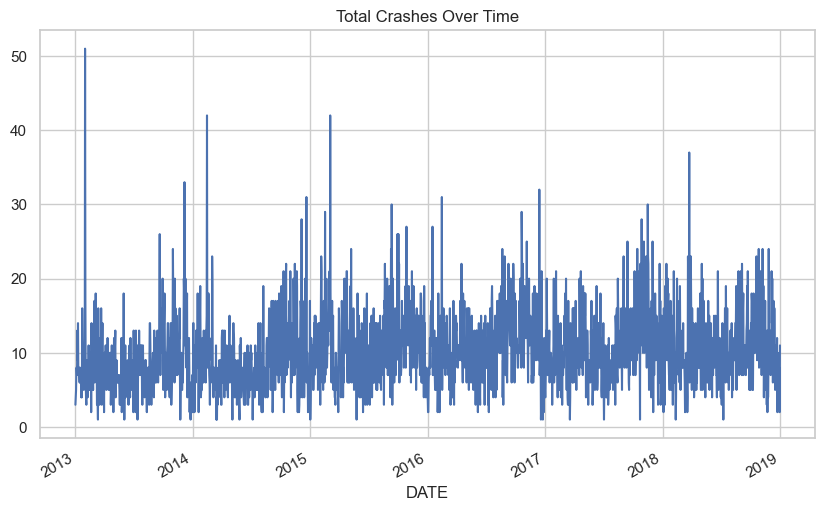

In [16]:
# Step 2: Visualize the data
daily_crashes['TOTAL_CRASHES'].plot(figsize=(10, 6))
plt.title('Total Crashes Over Time')
plt.show()

In [21]:
weekly_data = daily_crashes.resample('W').sum()
weekly_data

,TOTAL_CRASHES
DATE,
2013-01-06,35
2013-01-13,67
2013-01-20,46
2013-01-27,65
2013-02-03,103
...,...
2018-12-09,92
2018-12-16,84
2018-12-23,57


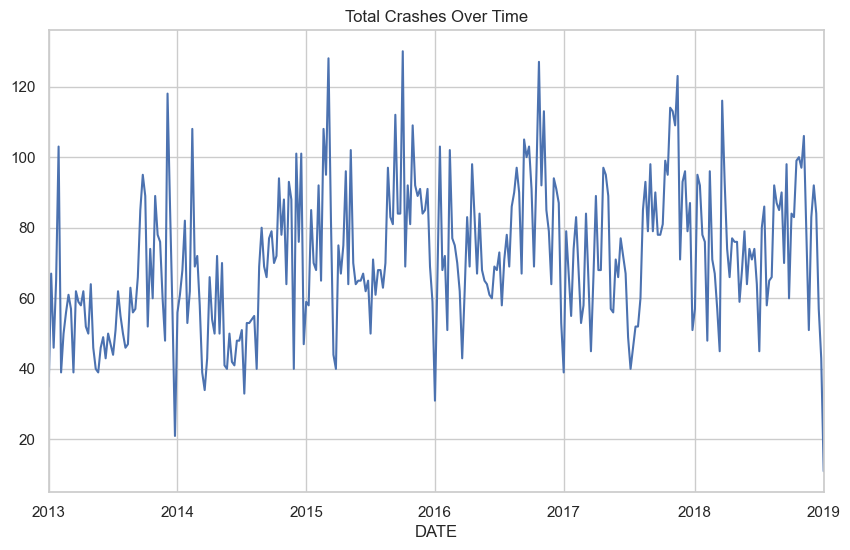

In [22]:
# Step 2: Visualize the data
weekly_data['TOTAL_CRASHES'].plot(figsize=(10, 6))
plt.title('Total Crashes Over Time')
plt.show()

In [23]:
train = weekly_data['2013':'2017']
test = weekly_data['2018':]

In [17]:
# Step 3: Split the data into training and testing sets
train = daily_crashes['2015':'2017']  # Train on data until 2017
test = daily_crashes['2018':]  # Test on data from 2018

In [24]:
# Step 4: Build and fit SARIMA model
# Here we assume (p, d, q) = (1, 1, 1) and (P, D, Q, m) = (1, 1, 1, 12) as an example.
model = SARIMAX(train['TOTAL_CRASHES'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_model = model.fit()

c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [25]:
# Step 5: Forecast for the test period
predictions = sarima_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

c:\Users\siswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


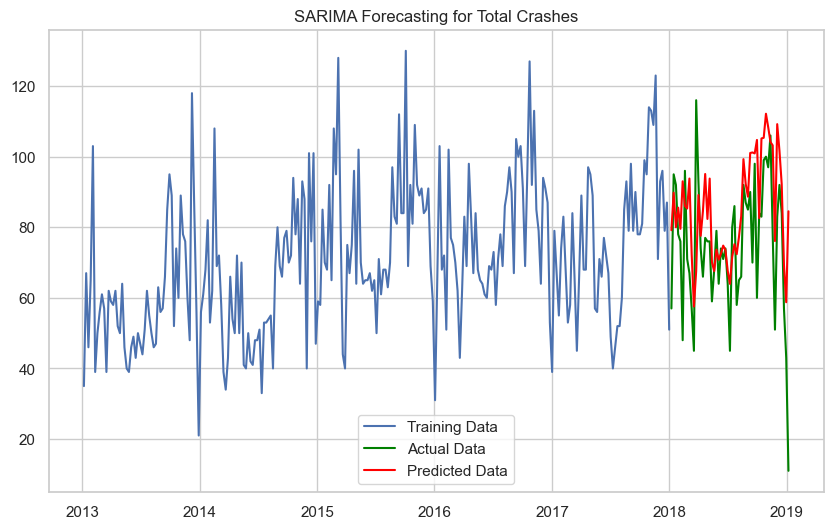

Mean Squared Error: 394.9394525260543


In [26]:
# Step 6: Plot actual vs predicted crashes
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['TOTAL_CRASHES'], label='Training Data')
plt.plot(test.index, test['TOTAL_CRASHES'], label='Actual Data', color='green')
plt.plot(test.index, predictions, label='Predicted Data', color='red')
plt.title('SARIMA Forecasting for Total Crashes')
plt.legend()
plt.show()

# Step 7: Evaluate model performance
mse = mean_squared_error(test['TOTAL_CRASHES'], predictions)
print(f"Mean Squared Error: {mse}")


In [42]:
df.columns

Index(['Agency', 'City', 'DATE', 'TIME', 'VEH#', 'Trailers', 'INJ', 'DEAD',
       'DEER', 'House#', 'Roadway Id', 'Intersect Rd.', 'Interchange', 'Ramp',
       'Property Type', 'Feet From', 'Dir', 'Latitude', 'Longitude',
       'Road Class', 'H&R', 'Locality', 'School ', 'Rumble Strips', 'CN Zone',
       'CN Type', 'Light', 'Weather', 'Surf Con', 'Median', 'Rd Junction',
       'Road Char', 'Surface', 'Primary Factor', 'Collision Type', 'Unique Id',
       'Traffic Control', 'DATETIME', 'CRASH_COUNT'],
      dtype='object')

In [48]:
df['Surface'].unique()

array(['ASP', 'GRAVEL', 'CON', nan, 'OTHER - EXPLAIN IN NARRATIVE',
       'OTHER'], dtype=object)

In [31]:
# Forecasting 12 weeks into the future
forecast = sarima_model.forecast(steps=2*52)

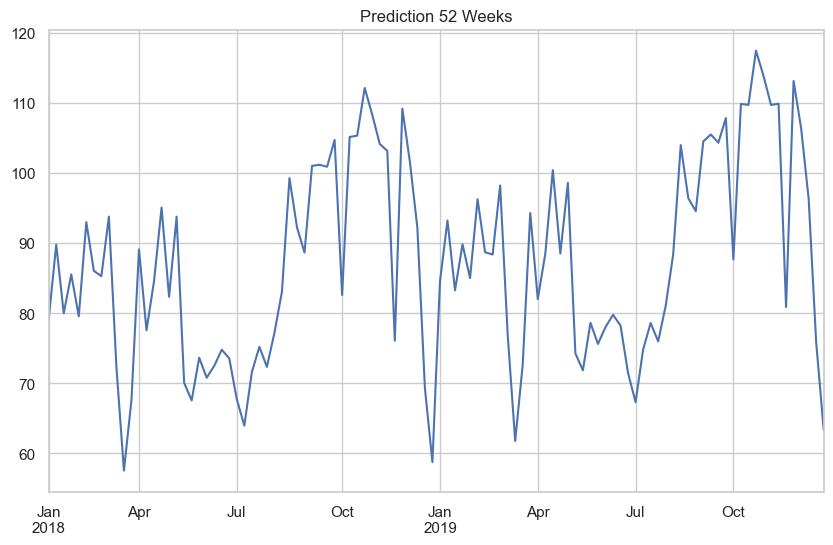

In [32]:
forecast.plot(figsize=(10, 6))
plt.title('Prediction 52 Weeks')
plt.show()

In [69]:
df[df['Weather'] == 'FOG/SMOKE/SMOG']

,Agency,City,DATE,TIME,VEH#,Trailers,INJ,DEAD,DEER,House#,...,Median,Rd Junction,Road Char,Surface,Primary Factor,Collision Type,Unique Id,Traffic Control,DATETIME,CRASH_COUNT
6923,BPD,BLOOMINGTON,2018-01-10,07:00:00,1,0,0.0,0.0,0.0,NaN,...,NaN,T,STRAIGHT/GRADE,ASP,ANIMAL/OBJECT IN ROADWAY,DEER,BLUERIDGEDRNORTHWALNUTST,NONE,2018-01-10 07:00:00,1
7192,MCSD,BLOOMINGTON,2018-01-28,01:08:00,1,0,1.0,0.0,0.0,NaN,...,NONE,T,STRAIGHT/GRADE,ASP,RAN OFF ROAD RIGHT,RAN OFF ROAD,SROGERSSTWCHURCHLN,NONE,2018-01-28 01:08:00,1
8805,DNR LAW ENFORCEMENT,BLOOMINGTON,2018-07-24,23:00:00,1,0,0.0,0.0,0.0,8955,...,NONE,NONE,CURVE/LEVEL,ASP,UNSAFE SPEED,RAN OFF ROAD,SFAIRFAXRD,NONE,2018-07-24 23:00:00,1
9035,BPD,BLOOMINGTON,2018-01-27,23:00:00,2,0,0.0,0.0,0.0,117,...,NaN,NONE,STRAIGHT/LEVEL,ASP,UNSAFE BACKING,BACKING CRASH,SFRANKLINRD,LANE CONTROL,2018-01-27 23:00:00,1
9821,BPD,BLOOMINGTON,2018-09-26,09:20:00,1,0,0.0,0.0,0.0,NaN,...,NaN,4-WAY,STRAIGHT/LEVEL,ASP,RAN OFF ROAD RIGHT,RAN OFF ROAD,SHENDERSONSTWYLIEFARMRD,STOP SIGN,2018-09-26 09:20:00,1
12037,MCSD,BLOOMINGTON,2018-11-03,08:05:00,1,0,0.0,0.0,1.0,NaN,...,NaN,NONE,STRAIGHT/LEVEL,ASP,ANIMAL/OBJECT IN ROADWAY,DEER,EMOFFETTLNSHANDYRD,LANE CONTROL,2018-11-03 08:05:00,1
13662,MCSD,BLOOMINGTON,2018-12-02,05:54:00,1,0,0.0,0.0,0.0,NaN,...,NaN,T,STRAIGHT/LEVEL,ASP,SPEED TOO FAST - WEATHER,RAN OFF ROAD,CHURCHLNSROGERSST,NONE,2018-12-02 05:54:00,1
13930,ELLPD,ELLETTSVILLE,2018-01-09,00:25:00,3,0,0.0,0.0,0.0,NaN,...,NaN,NONE,STRAIGHT/HILLCREST,ASP,OTHER (DRIVER),REAR END,SALESTSTVINESTST,NONE,2018-01-09 00:25:00,1
15337,MCSD,BLOOMINGTON,2018-11-03,09:37:00,2,0,0.0,0.0,0.0,NaN,...,NaN,T,STRAIGHT/LEVEL,ASP,FAILURE TO YIELD RIGHT OF WAY,RIGHT ANGLE,EASTSMITHVILLERDSR37S,NONE,2018-11-03 09:37:00,1
18966,ISP,BLOOMINGTON,2018-01-09,18:26:00,2,0,1.0,0.0,0.0,NaN,...,NaN,4-WAY,STRAIGHT/LEVEL,ASP,FOLLOWING TOO CLOSELY,REAR END,SR445SR45,SIGNAL,2018-01-09 18:26:00,1


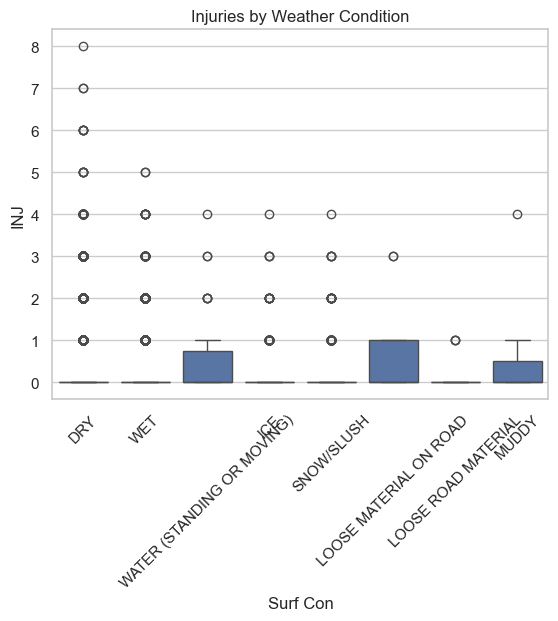

In [71]:
import seaborn as sns

# Create a box plot
sns.boxplot(x='Surf Con', y='INJ', data=df)
plt.xticks(rotation=45)
plt.title('Injuries by Weather Condition')
plt.show()


In [72]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le_weather = LabelEncoder()
le_light = LabelEncoder()
le_surf_con = LabelEncoder()

# Apply encoding
df['Weather_encoded'] = le_weather.fit_transform(df['Weather'])
df['Light_encoded'] = le_light.fit_transform(df['Light'])
df['Surf_Con_encoded'] = le_surf_con.fit_transform(df['Surf Con'])


In [73]:
# Fill missing values
df['Weather_encoded'].fillna(df['Weather_encoded'].mode()[0], inplace=True)
df['Light_encoded'].fillna(df['Light_encoded'].mode()[0], inplace=True)
df['Surf_Con_encoded'].fillna(df['Surf_Con_encoded'].mode()[0], inplace=True)


C:\Users\siswa\AppData\Local\Temp\ipykernel_16464\2421305959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather_encoded'].fillna(df['Weather_encoded'].mode()[0], inplace=True)
C:\Users\siswa\AppData\Local\Temp\ipykernel_16464\2421305959.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [74]:
# Define features and target variable
X = df[['Weather_encoded', 'Light_encoded', 'Surf_Con_encoded']]
y = df['INJ']  # Target variable: Number of injuries

In [75]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [80]:
# Check for NaN values in the target variable
print(y.isnull().sum())


0


In [78]:
# Drop rows where target variable is NaN
df_cleaned = df.dropna(subset=['INJ'])
X_cleaned = df_cleaned[['Weather_encoded', 'Light_encoded', 'Surf_Con_encoded']]
y_cleaned = df_cleaned['INJ']


In [79]:
# Impute missing values with the mean
y.fillna(y.mean(), inplace=True)

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = df[['Weather_encoded', 'Light_encoded', 'Surf_Con_encoded']]
y = df['INJ']

# Drop rows with missing target values
X = X[~y.isna()]
y = y.dropna()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.3812034571941313


In [85]:
y_train

15964    2.0
15971    1.0
19221    0.0
7913     0.0
6997     0.0
        ... 
13123    1.0
19648    0.0
9845     0.0
10799    0.0
2732     0.0
Name: INJ, Length: 17928, dtype: float64

In [90]:
df['Weather']

0         CLEAR
1        CLOUDY
2         CLEAR
3          RAIN
4        CLOUDY
          ...  
22406     CLEAR
22407     CLEAR
22408       NaN
22409     CLEAR
22410    CLOUDY
Name: Weather, Length: 22411, dtype: object

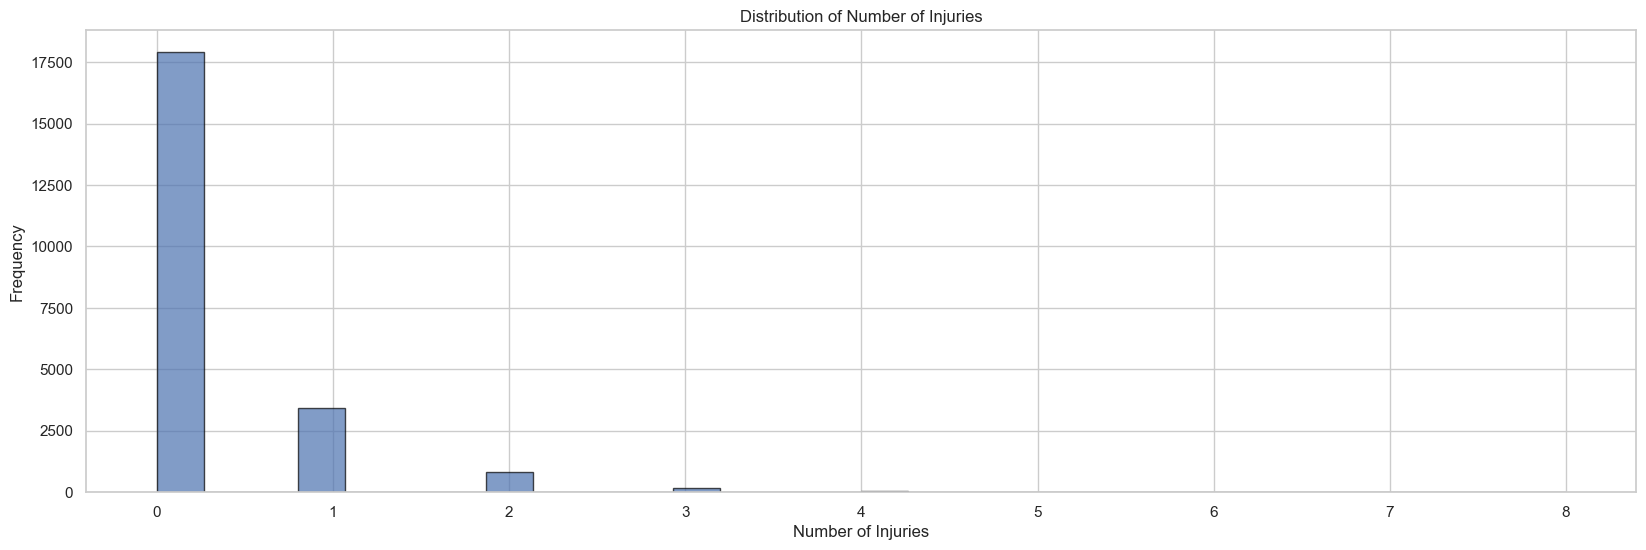

In [94]:
# Plot histogram
plt.figure(figsize=(20, 6))
plt.hist(df['INJ'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Number of Injuries')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Injuries')
plt.grid(True)
plt.show()

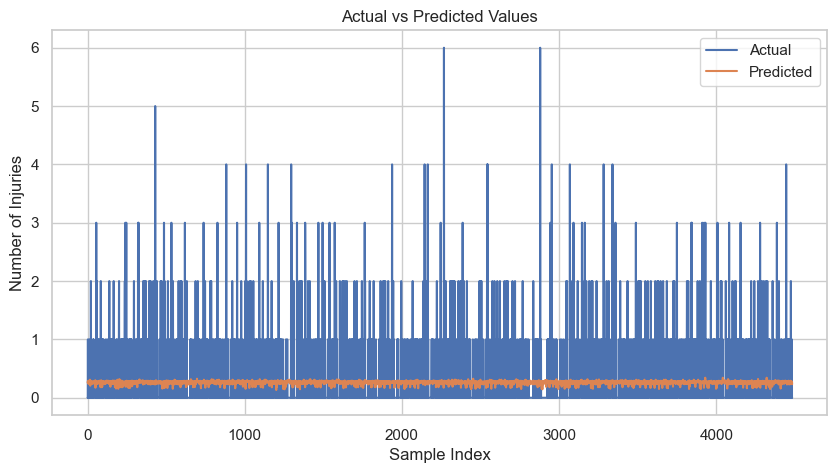

In [96]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Number of Injuries')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [97]:
X

,Weather_encoded,Light_encoded,Surf_Con_encoded
0,2,0,0
1,3,3,0
2,2,3,0
3,6,3,7
4,3,3,0
...,...,...,...
22406,2,1,0
22407,2,4,0
22408,10,4,8
22409,2,3,0
